<a href="https://colab.research.google.com/github/yuliiabosher/Adam_Smith_project/blob/main/Visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import collections

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [3]:
def month_to_number(month):
  months = {"january": "1", "february": "2", "march": "3", "april": "4", "may": "5", "june": "6", "july": "7", \
            "august": "8", "september": "9", "october": "10", "november": "11", "december": "12"}
  month = month.lower()
  numerical = months[month]
  return numerical

def to_date(string):
  elements = string.split(',')
  year = elements[-1].strip()
  month, day = elements[-2].split()
  month = month_to_number(month)
  date = f'{year}-{month}-{day}'
  return date

,Extract,Notes,Notes2,About Adam Smith,Rep
Date,,,,,
2015-12-16,"It was on this very day, December 16, 1773, th...",n/a,n/a,"-, free market economics","Kevin John Cramer,\nRepublican Party"
2017-02-02,Adam Smith is spinning in his grave as he list...,"In other words, the price to be paid to make t...",n/a,-Adam Smith is spinning in his grave as he lis...,Edward John Markey\nDemocratic Party
2017-04-27,It is enough for people to inherit a house or ...,n/a,n/a,-“: You don’t want to have inherited wealth in...,Jamie Raskin\nDemocratic Party
2017-07-13,We can’t ignore the idea that even though Adam...,n/a,n/a,-‘‘The Wealth of Nations’’\n- fundamental prin...,n/a
2017-10-03,"At the hearing today, I heard my Republican co...",So let’s pay attention here. Adam Smith said t...,n/a,"-, ‘‘The Wealth of Nations,\n- “Maintain the s...",n/a
2017-10-10,These early settlers were driven by religious ...,n/a,n/a,-capitalism. \n-The name of it is ‘‘The Wealth...,n/a
2017-11-27,You have consistently stressed that the object...,n/a,n/a,n/a,n/a
2018-03-13,"Mr. ARRINGTON. Mr. Speaker, the year 1776 mark...",n/a,n/a,-‘‘The Wealth of Nations’’\n- free markets and...,n/a
2018-04-11,The first one I would like to point out becaus...,n/a,n/a,"-‘‘The Wealth of Nations,’’\n- invisible hand\...",n/a


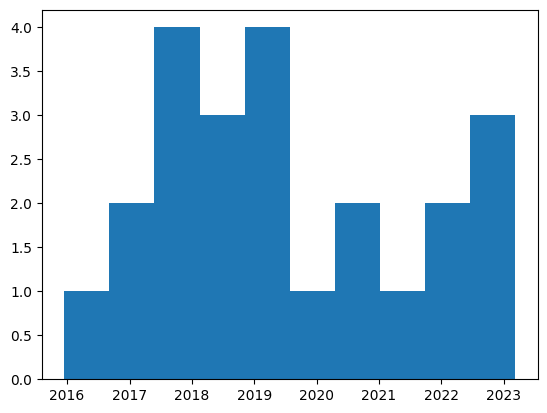

In [9]:
df = pd.read_excel('https://github.com/yuliiabosher/Adam_Smith_project/raw/main/adam_smith.xlsx', skiprows=1)
df = df.fillna('n/a')
df = df.drop(df[df['Mention of Adam smith'].str.contains('NA')].index)
df = df.drop(df[df['Mention of Adam smith'].str.contains('n/a')].index)
df.columns = ['Date', 'Extract', 'Notes', 'Notes2', 'About Adam Smith', 'Rep']
dates = []
for index, row in df.iterrows():
  dates.append(to_date(row['Date']))
df['Date'] = dates
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()
plt.hist(df.index)
df

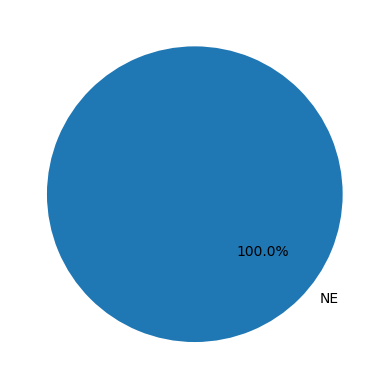

In [5]:
ner_categories = collections.defaultdict(int)
for index, row in df.iterrows():
  sentences = nltk.sent_tokenize(row['Extract'])
  token_sentences = [nltk.word_tokenize(sent) for sent in sentences]
  pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]
  chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)
  for sent in chunked_sentences:
    for chunk in sent:
      if hasattr(chunk, 'label'):
        ner_categories[chunk.label()] += 1

labels = list(ner_categories.keys())
values = [ner_categories.get(v) for v in labels]
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()


In [14]:
ner_categories = collections.defaultdict(int)
for index, row in df.iterrows():
  sentences = nltk.sent_tokenize(row['Extract'])
  token_sentences = [nltk.word_tokenize(sent) for sent in sentences]
  pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]
  chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)
  for sent in chunked_sentences:
    for chunk in sent:
      if hasattr(chunk, 'label'):
        print(chunk)





(NE Boston/NNP Harbor/NNP)
(NE Boston/NNP Tea/NNP Party/NNP)
(NE Adam/NNP Smith/NNP)
(NE Adam/NNP Smith/NNP)
(NE Adam/NNP Smith/NNP)
(NE Adam/NNP Smith/NNP)
(NE Adam/NNP Smith/NNP)
(NE Adam/NNP Smith/NNP)
(NE Nations/NNP)
(NE Mr./NNP HUNTER/NNP)
(NE Adam/NNP Smith/NNP)
(NE Adam/NNP Smith/NNP)
(NE Nations/NNP)
(NE Adam/NNP Smith/NNP)
(NE British/JJ)
(NE British/JJ)
(NE British/JJ)
(NE Mr./NNP Speaker/NNP)
(NE Adam/NNP Smith/NNP)
(NE Nations/NNP)
(NE Adam/NNP Smith/NNP)
(NE Mr./NNP ARRINGTON/NNP)
(NE Mr./NNP Speaker/NNP)
(NE American/JJ)
(NE America/NNP)
(NE Scottish/JJ)
(NE Adam/NNP Smith/NNP)
(NE Nations/NNP)
(NE Mr./NNP Speaker/NNP)
(NE Adam/NNP)
(NE Nations/NNP)
(NE Chicago/NNP)
(NE Adam/NNP Smith/NNP)
(NE Same/NN)
(NE WASHINGTON/NNP)
(NE America/NNP)
(NE American/JJ)
(NE Scottish/JJ)
(NE Adam/NNP Smith/NNP)
(NE Senator/NNP)
(NE CARPER/NNP)
(NE Adam/NNP Smith/NNP)
(NE Adam/NNP Smith/NNP)
(NE Adam/NNP Smith/NNP)
(NE Ronald/NNP Reagan/NNP)
(NE George/NNP Bush/NNP)
(NE Jack/NNP Kemp/NNP

In [ ]:
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]
  pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]
  chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)
  for sent in chunked_sentences:
    for chunk in sent:
      if hasattr(chunk, 'label'):
        ner_categories[chunk.label()] += 1

In [18]:
import spacy
ner_categories = collections.defaultdict(int)
entity_frequency = collections.defaultdict(int)
for index, row in df.iterrows():
  nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'matcher'])
  doc = nlp(row['Extract'])
  for ent in doc.ents:
    ner_categories[ent.text] = ent.label_
    entity_frequency[ent.text] +=1
print(entity_frequency)

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


defaultdict(<class 'int'>, {'this very day': 1, 'December 16, 1773': 1, 'Boston Harbor': 1, 'the Boston Tea Party': 1, 'Adam Smith': 25, 'one': 1, 'Republicans': 3, 'two': 1, 'hundreds of millions or billions of dollars': 1, 'on ‘‘The Wealth of Nations': 1, 'a glorious year, 1776': 1, 'today': 2, 'Republican': 1, 'HUNTER': 1, 'Adam Smith’s': 1, 'the British Government': 1, 'British': 3, 'the year of 1776': 1, 'the Declaration': 1, 'July 4 of that year': 1, 'Speaker': 3, '‘‘The Wealth of Nations': 1, 'ARRINGTON': 1, 'the year 1776': 1, 'American': 2, 'America': 2, 'Scottish': 3, 'first': 2, 'The Wealth of Nations': 1, 'Chicago': 1, 'the late 1700s': 1, 'WASHINGTON': 1, 'WEDNESDAY': 1, 'DECEMBER 19, 2018': 1, '1776': 2, 'a revolutionary year': 1, 'that year': 1, '200 years': 1, 'CARPER': 1, 'the early 2020s': 1, '50 to 60 percent': 1, 'the last 5 to 6 years': 1, 'Ronald Reagan': 1, 'George Bush': 1, 'Jack Kemp': 1, 'Henry Ford': 1, 'Donald Trump': 1, 'Western Hemisphere': 1, 'the same ye